In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# importing the libraries 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt
%matplotlib inline
import plotly.express as px

In [5]:
# loading the datset
data=pd.read_csv("D:\\juypter notebook\\projects\\zoo.csv")
data


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
data.shape

(101, 18)

the data consist of 101 observations and 18 columns 



**1. Data Preprocessing
* Evaluate the missing values and duplicates
* Set the features and target
* Check data type
* Train-Test-Split**

In [7]:
data.isnull().sum() # checking the null values in the dataset

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [8]:
data.nunique()

animal_name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
class_type       7
dtype: int64

In [9]:

#check if there are duplicates in animal_name
duplicates = data.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

In [10]:
frog = data.loc[data['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [11]:
data["animal_name"][(data.animal_name == 'frog')&(data.venomous==1)]="frog_venomous"

C:\Users\DELL\AppData\Local\Temp\ipykernel_15020\1347358114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["animal_name"][(data.animal_name == 'frog')&(data.venomous==1)]="frog_venomous"


In [12]:
data["class_type"].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [13]:
data1=data["class_type"].replace(1,"Mammals").replace(2,"Bird").replace(3,"Reptile").replace(4,"Fish").replace(5,"Amphibian").replace(6,"Bug").replace(7,"Invertebrate")
           

In [14]:
data1

0           Mammals
1           Mammals
2              Fish
3           Mammals
4           Mammals
           ...     
96          Mammals
97              Bug
98          Mammals
99     Invertebrate
100            Bird
Name: class_type, Length: 101, dtype: object

In [15]:
zoo = pd.merge(data,data1,left_index=True,right_index=True)
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type_x,class_type_y
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammals
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammals
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammals
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammals


In [16]:
df=zoo.drop("class_type_x",axis=1)

In [17]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type_y
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammals
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammals
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammals
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mammals
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Bug
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammals
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrate


Since it is a ditochomous data we cannot compute correlation .So in order to check the relation of the variables with their class type we use hypothesis i.e chi-square test.

In [18]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['class_type'], data['hair'])

# Perform the chi-square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', stat)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 85.0381794355233
p-value: 3.241550711414804e-16
Degrees of freedom: 6
Expected frequencies: [[23.54455446 17.45544554]
 [11.48514851  8.51485149]
 [ 2.87128713  2.12871287]
 [ 7.46534653  5.53465347]
 [ 2.2970297   1.7029703 ]
 [ 4.59405941  3.40594059]
 [ 5.74257426  4.25742574]]


The null hypothesis of the test is that there is no association between the class type and the hair type. If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a significant association between the class type and the hair type in the dataset.

In [19]:
contingency_table = pd.crosstab(data['class_type'], data['legs'])

# Perform the chi-square test
stat, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', stat)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 241.7289361231522
p-value: 5.942172597812372e-35
Degrees of freedom: 30
Expected frequencies: [[ 9.33663366 10.96039604 15.42574257  0.40594059  4.05940594  0.81188119]
 [ 4.55445545  5.34653465  7.52475248  0.1980198   1.98019802  0.3960396 ]
 [ 1.13861386  1.33663366  1.88118812  0.04950495  0.4950495   0.0990099 ]
 [ 2.96039604  3.47524752  4.89108911  0.12871287  1.28712871  0.25742574]
 [ 0.91089109  1.06930693  1.5049505   0.03960396  0.3960396   0.07920792]
 [ 1.82178218  2.13861386  3.00990099  0.07920792  0.79207921  0.15841584]
 [ 2.27722772  2.67326733  3.76237624  0.0990099   0.99009901  0.1980198 ]]


In [20]:
plt.style.use("dark_background")#to set the background color
plt.rcParams["figure.figsize"]=[12,6]# setting the graph size

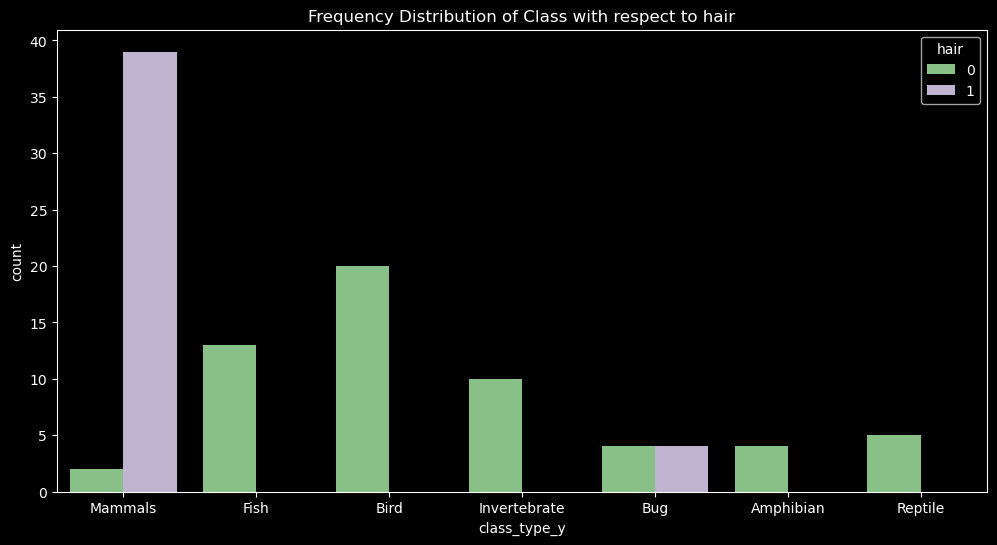

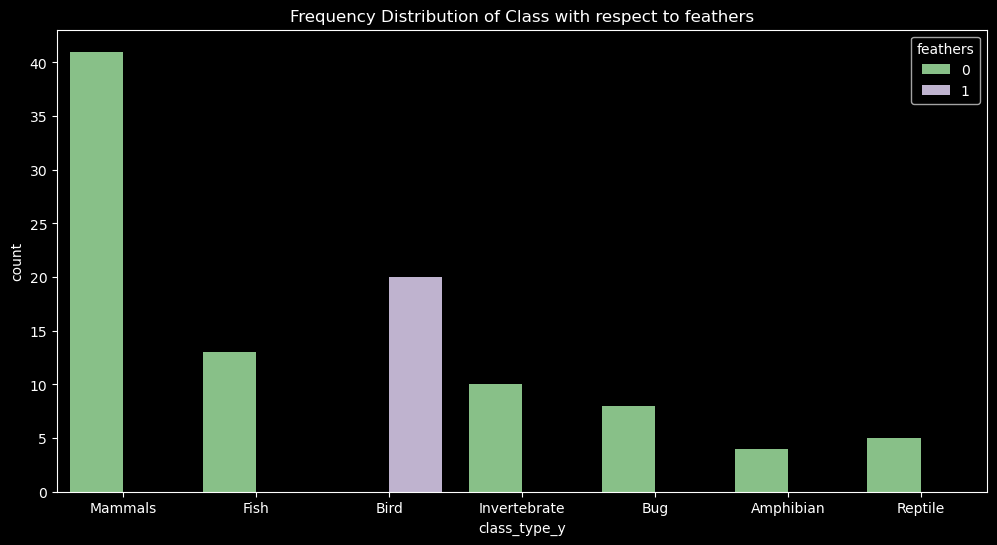

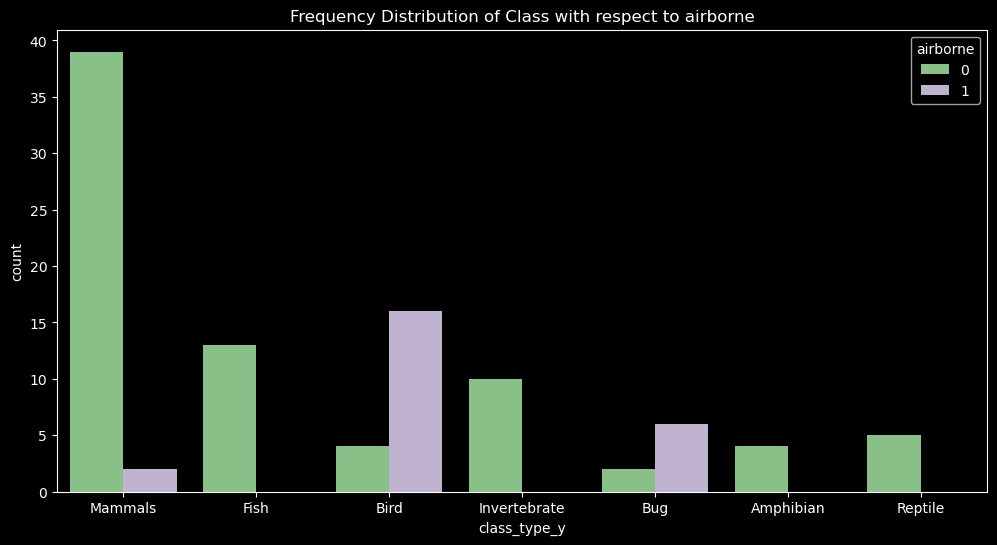

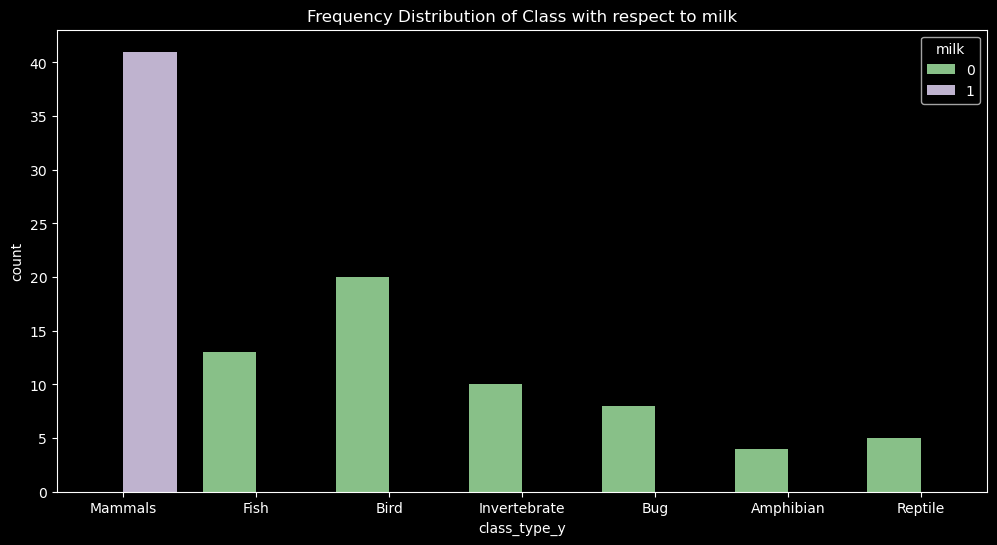

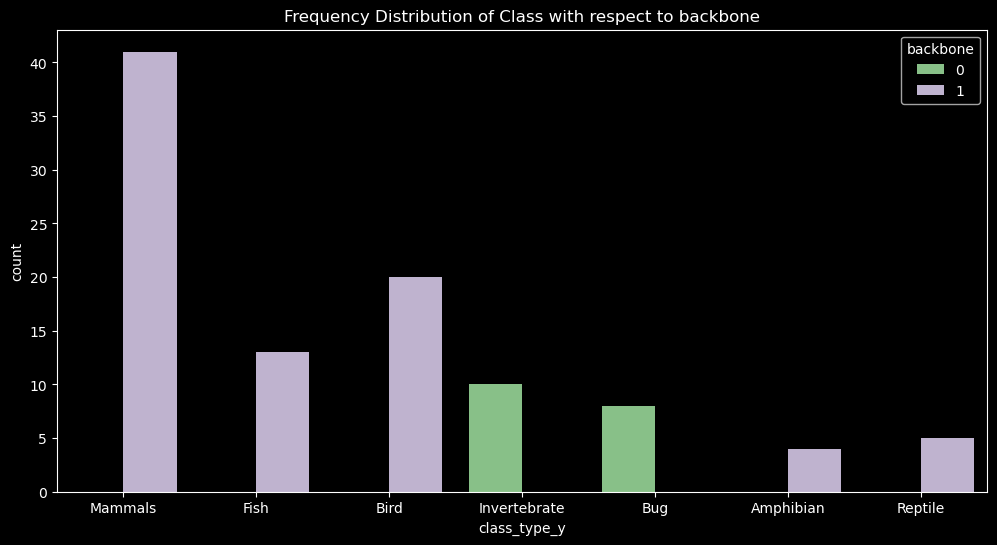

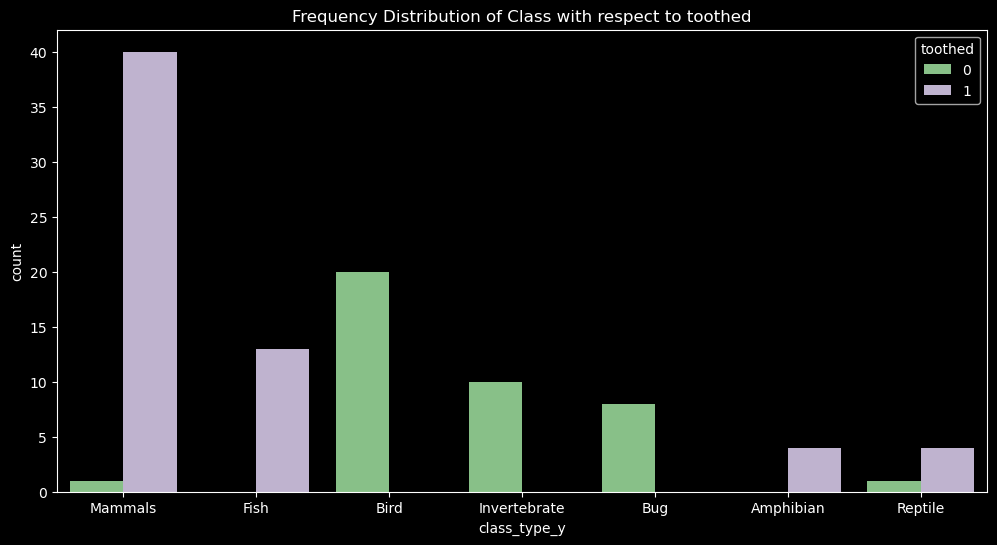

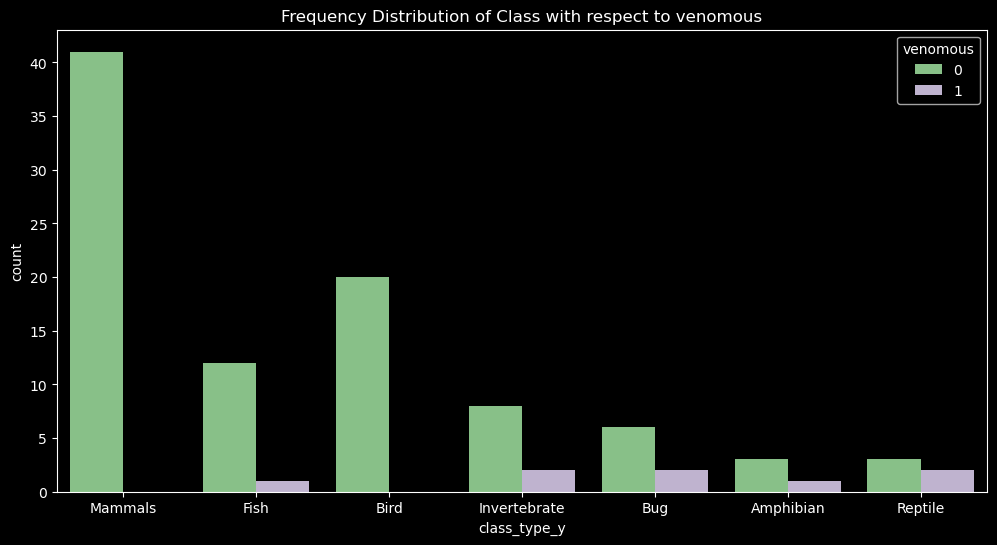

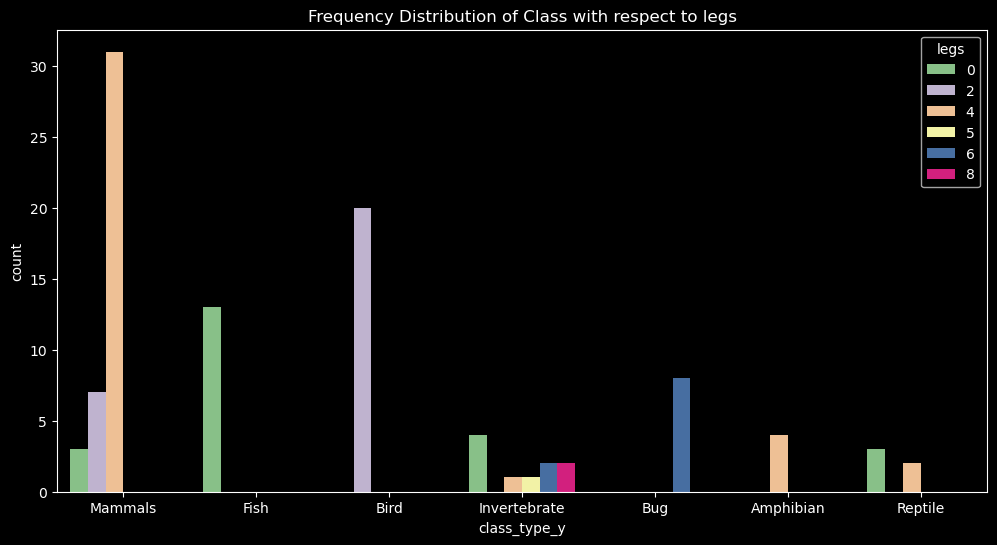

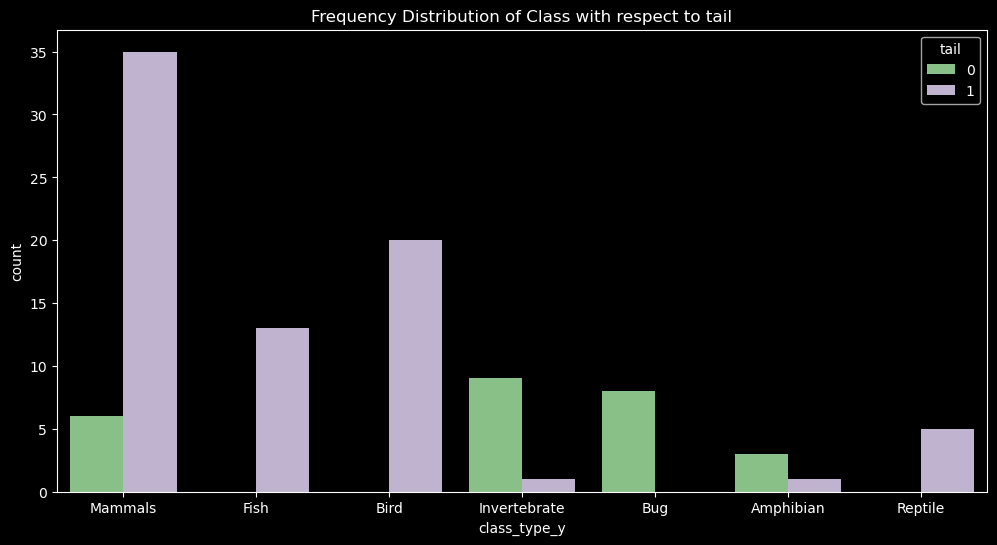

In [21]:
# visulisation  
for hue in ["hair", "feathers", "airborne", "milk", "backbone", "toothed", "venomous", "legs", "tail"]:  
    sns.countplot(data = zoo, x = "class_type_y", hue = hue, palette = "Accent")
    plt.title(f"Frequency Distribution of Class with respect to {hue}")
    plt.show()

Conclusion from the graphs:
1:Most of the  Mammals and 50% of the Bug have legs .
2:


<Axes: xlabel='class_type_y', ylabel='count'>

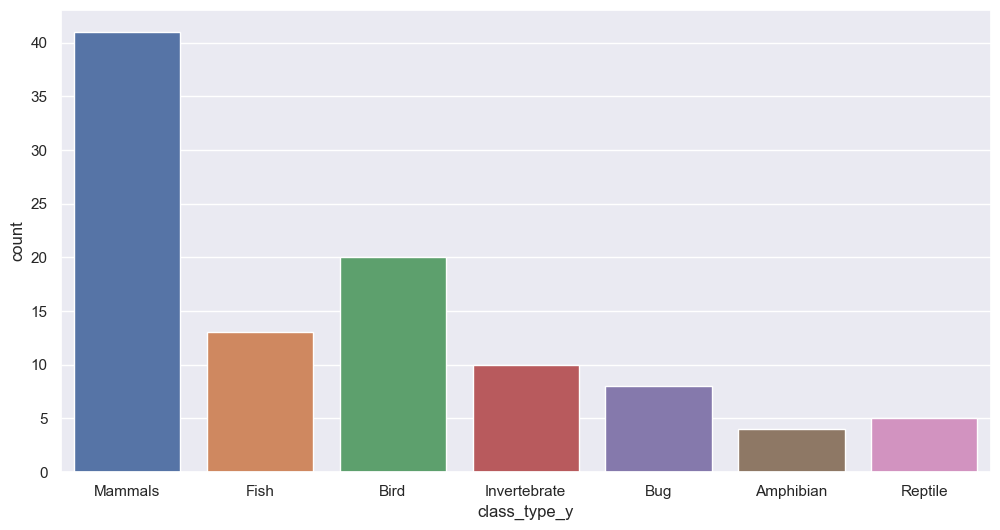

In [22]:
sns.set_theme(style="darkgrid")
#use seaborn to plot the count of each 7 class_type
sns.countplot(x='class_type_y',saturation=.80, data=zoo)

CONCLUSION : The class distribution is not perfectly balanced, as some classes have higher counts than others. This suggests that the dataset may have class imbalances, which could potentially affect the performance of classification models.

Class 1 (Mammal) has the highest count, followed by Class 2 (Bird) and Class 7 (Invertebrate). These three classes seem to be more prevalent in the dataset compared to the other classes.

Class 4 (Fish) has the lowest count among all the classes, indicating that it is the least represented class in the dataset.

In [24]:
label=["Mammal","Bird","Fish","Invertebrate","Bug","Reptile","Amphibian"]
values = zoo['class_type_y'].value_counts()

px.pie(zoo,values=values,labels=label,title="Animal Class Type Distribution Pie Chart")

The pie chart titled "Animal Class Type Distribution" provides an overview of the distribution of different animal class types in the dataset.
Mammals are the most common animal class type in the dataset, as indicated by the largest slice in the pie chart. This suggests that the dataset contains a significant number of mammal species.

Birds and Fish are the next most prevalent animal class types, represented by relatively large slices in the pie chart. This indicates that the dataset also includes a considerable number of bird and fish species.

Invertebrates, Bugs, Reptiles, and Amphibians have smaller portions in the pie chart, suggesting that the dataset contains fewer species from these animal class types compared to mammals, birds, and fish.

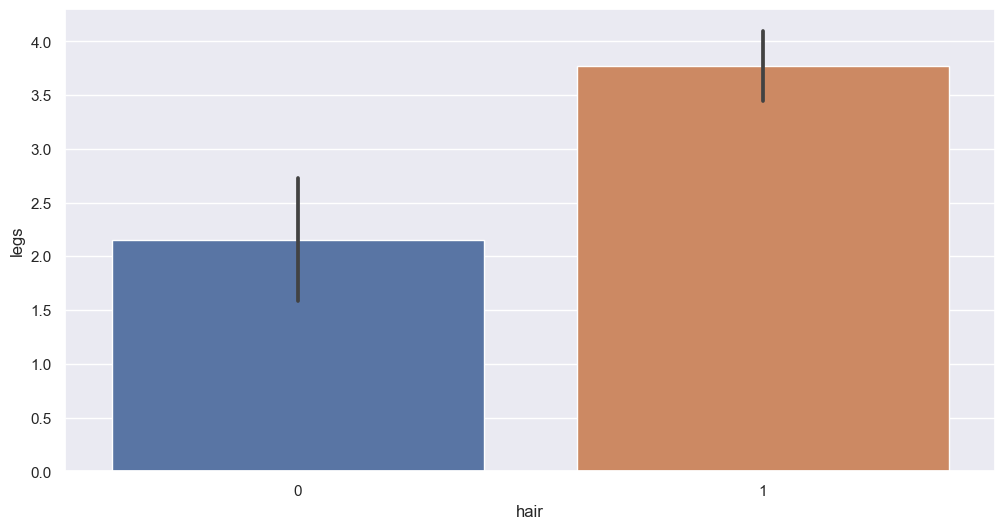

In [25]:
sns.barplot(x="hair",y="legs",data=data);

The bar plot illustrates the relationship between the "hair" and "legs" variables in the zoo dataset.

Animals with "hair": The bars represent the count or frequency of animals with and without hair. We can observe that there are more animals without hair compared to those with hair.

Number of Legs: The height of the bars represents the count or frequency of animals with a specific number of legs. The graph shows that the majority of animals in the dataset have four legs, followed by animals with two legs.

In [26]:
df.shape

(101, 18)

**2:Training and testing the data
* Decision Tree
* Random Forest
* Logistic Regression
* K-Nearest Neighbors**

In [27]:
features = list(df.columns)
print(features)
     

['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type_y']


In [28]:
features.remove('class_type_y')
features.remove('animal_name')

print(features)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


In [29]:
X = df[features]
Y = df.class_type_y
print(X.shape)
print(Y.shape)
     

(101, 16)
(101,)


In [30]:
# from sklearn.preprocessing import StandardScaler 
# scaler= StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [31]:
# split train test data into 70/30.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

# **1:LOGISTIC REGRESSION **

In [32]:

#Using Logistic Regression to Solve the Problem

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0,solver="lbfgs",multi_class="ovr")


In [33]:
len(X_train)

70

In [34]:
len(X_test)

31

In [35]:
#fitting he model
model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [36]:
model.predict(X_test)

array(['Mammals', 'Mammals', 'Mammals', 'Bird', 'Invertebrate', 'Bird',
       'Bug', 'Bird', 'Fish', 'Mammals', 'Mammals', 'Mammals', 'Fish',
       'Mammals', 'Bird', 'Mammals', 'Fish', 'Invertebrate', 'Mammals',
       'Bird', 'Amphibian', 'Invertebrate', 'Fish', 'Bird', 'Mammals',
       'Mammals', 'Bird', 'Mammals', 'Amphibian', 'Mammals', 'Bug'],
      dtype=object)

In [95]:
score=model.score(X_test,y_test)

In [38]:
a=model.predict_proba(X_test)

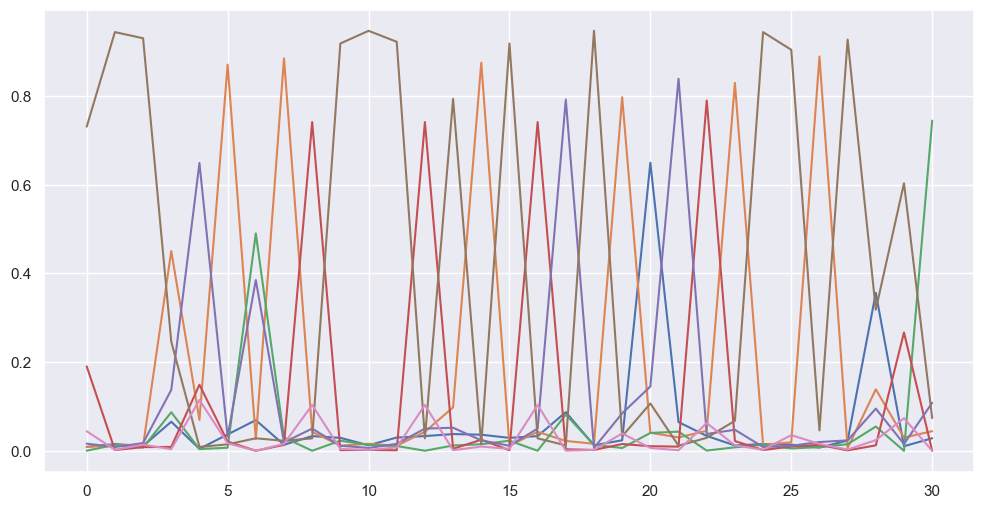

In [39]:
plt.plot(a)# plotting the probabilities 

In [40]:
# this is what the training dataset looks like
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
46,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
77,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
11,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1
49,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0


In [41]:
from sklearn import metrics
predictions = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 1  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0 13  0]
 [ 1  1  0  0  0  0  0]]


Text(117.24999999999999, 0.5, 'true')

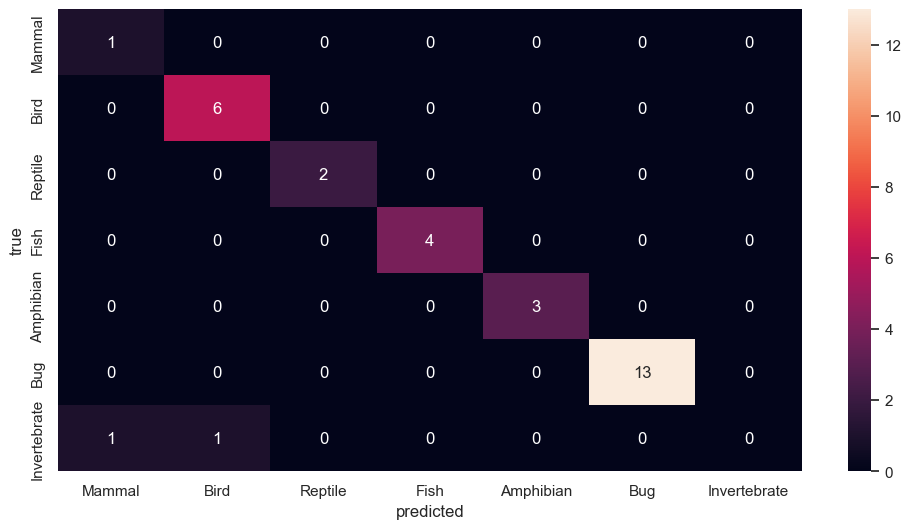

In [42]:
# Define labels for the matrix
labels = ["Mammal", "Bird", "Reptile", "Fish","Amphibian","Bug","Invertebrate"]

sns.heatmap(cm,annot=True,xticklabels=labels, yticklabels=labels)
plt.xlabel("predicted")
plt.ylabel("true")

CONCLUSION : The diagonal elements of the matrix represent the correctly classified instances for each class. These values are higher and brighter, indicating a good performance of the model in predicting those classes. On the other hand, the off-diagonal elements represent the instances that were misclassified. This means that the model predicted a different class than the actual class of those instances. These elements indicate the magnitude of misclassification. The intensity of the color or the annotation value in these cells gives us an idea of how many instances were misclassified into that specific combination of predicted and actual classes.

#The 7 Class Types are:

1. Mammal

2. Bird

3. Reptile

4. Fish

5. Amphibian

6. Bug

7. Invertebrate


conclusion:


In [68]:
print("training accuracy :", model.score(X_train, y_train))
print("testing accuracy :", model.score(X_test, y_test))

training accuracy : 1.0
testing accuracy : 0.9354838709677419


In [69]:
scores=[]
score=model.score(X_test, y_test)
scores.append(score)

# 2:K-NEAREST NEIGHBORS

In [44]:
# from sklearn.family_name import model
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# Initializing the model. Here we are
# using arbitrary value for 'K' i.e. 'n_neighbors'
model1 = KNeighborsClassifier(n_neighbors=8, metric='manhattan')

# training a knn model
model1.fit(X,Y)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

In [46]:
pred=model1.predict(X_test)

In [70]:
model1.score(X_test,y_test)

0.8709677419354839

In [96]:
score=accuracy_score(y_test, y_pred) 
score

0.9032258064516129

In [72]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

   Amphibian       0.33      1.00      0.50         1
        Bird       1.00      1.00      1.00         6
         Bug       1.00      1.00      1.00         2
        Fish       0.80      1.00      0.89         4
Invertebrate       1.00      0.67      0.80         3
     Mammals       0.92      0.92      0.92        13
     Reptile       0.00      0.00      0.00         2

    accuracy                           0.87        31
   macro avg       0.72      0.80      0.73        31
weighted avg       0.86      0.87      0.85        31



D:\user_anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\user_anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

D:\user_anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Text(0, 0.5, 'Error Rate')

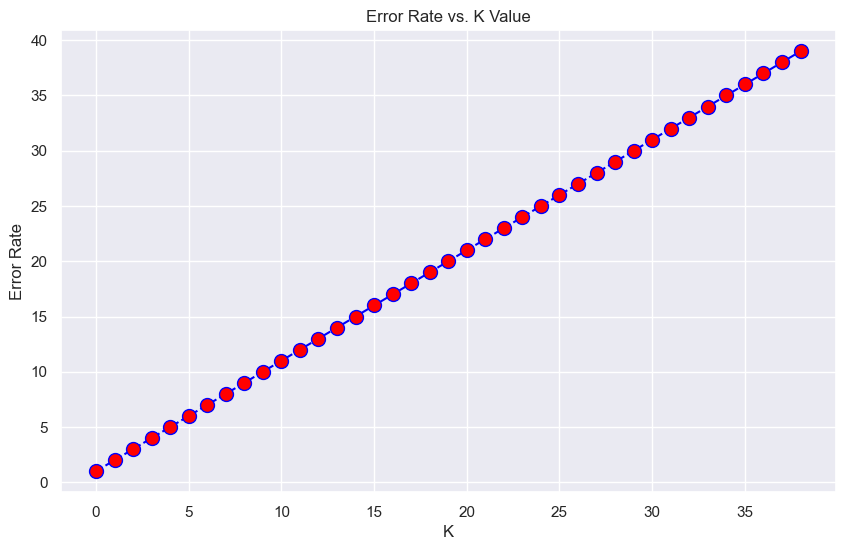

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

CONCLUSION : In this code, we calculate the accuracy score using both model1.score and accuracy_score and print the results. Then, we compute the error rate for different K values by iterating over the range of 1 to 40. We train a new KNeighborsClassifier model for each K value and compute the error rate by subtracting the accuracy score from 1. Finally, we plot the error rate against the K value using plt.plot and display the graph using plt.show().

# 3:DECISION TREE

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [77]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [78]:
dt.score(X_test, y_test)

0.9032258064516129

In [79]:
y_pred = dt.predict(X_test) # making prediction 
y_pred

array(['Mammals', 'Mammals', 'Mammals', 'Invertebrate', 'Invertebrate',
       'Bird', 'Invertebrate', 'Bird', 'Fish', 'Mammals', 'Mammals',
       'Mammals', 'Fish', 'Mammals', 'Bird', 'Mammals', 'Fish',
       'Invertebrate', 'Mammals', 'Bird', 'Amphibian', 'Invertebrate',
       'Fish', 'Bird', 'Mammals', 'Mammals', 'Bird', 'Mammals',
       'Amphibian', 'Mammals', 'Bug'], dtype=object)

In [97]:
score=accuracy_score(y_test, y_pred) 
score

0.9032258064516129

In [81]:
print(confusion_matrix(y_test, y_pred)) 

[[ 1  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0 13  0]
 [ 1  0  0  0  1  0  0]]


In [82]:
zoo.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type_x',
       'class_type_y'],
      dtype='object')

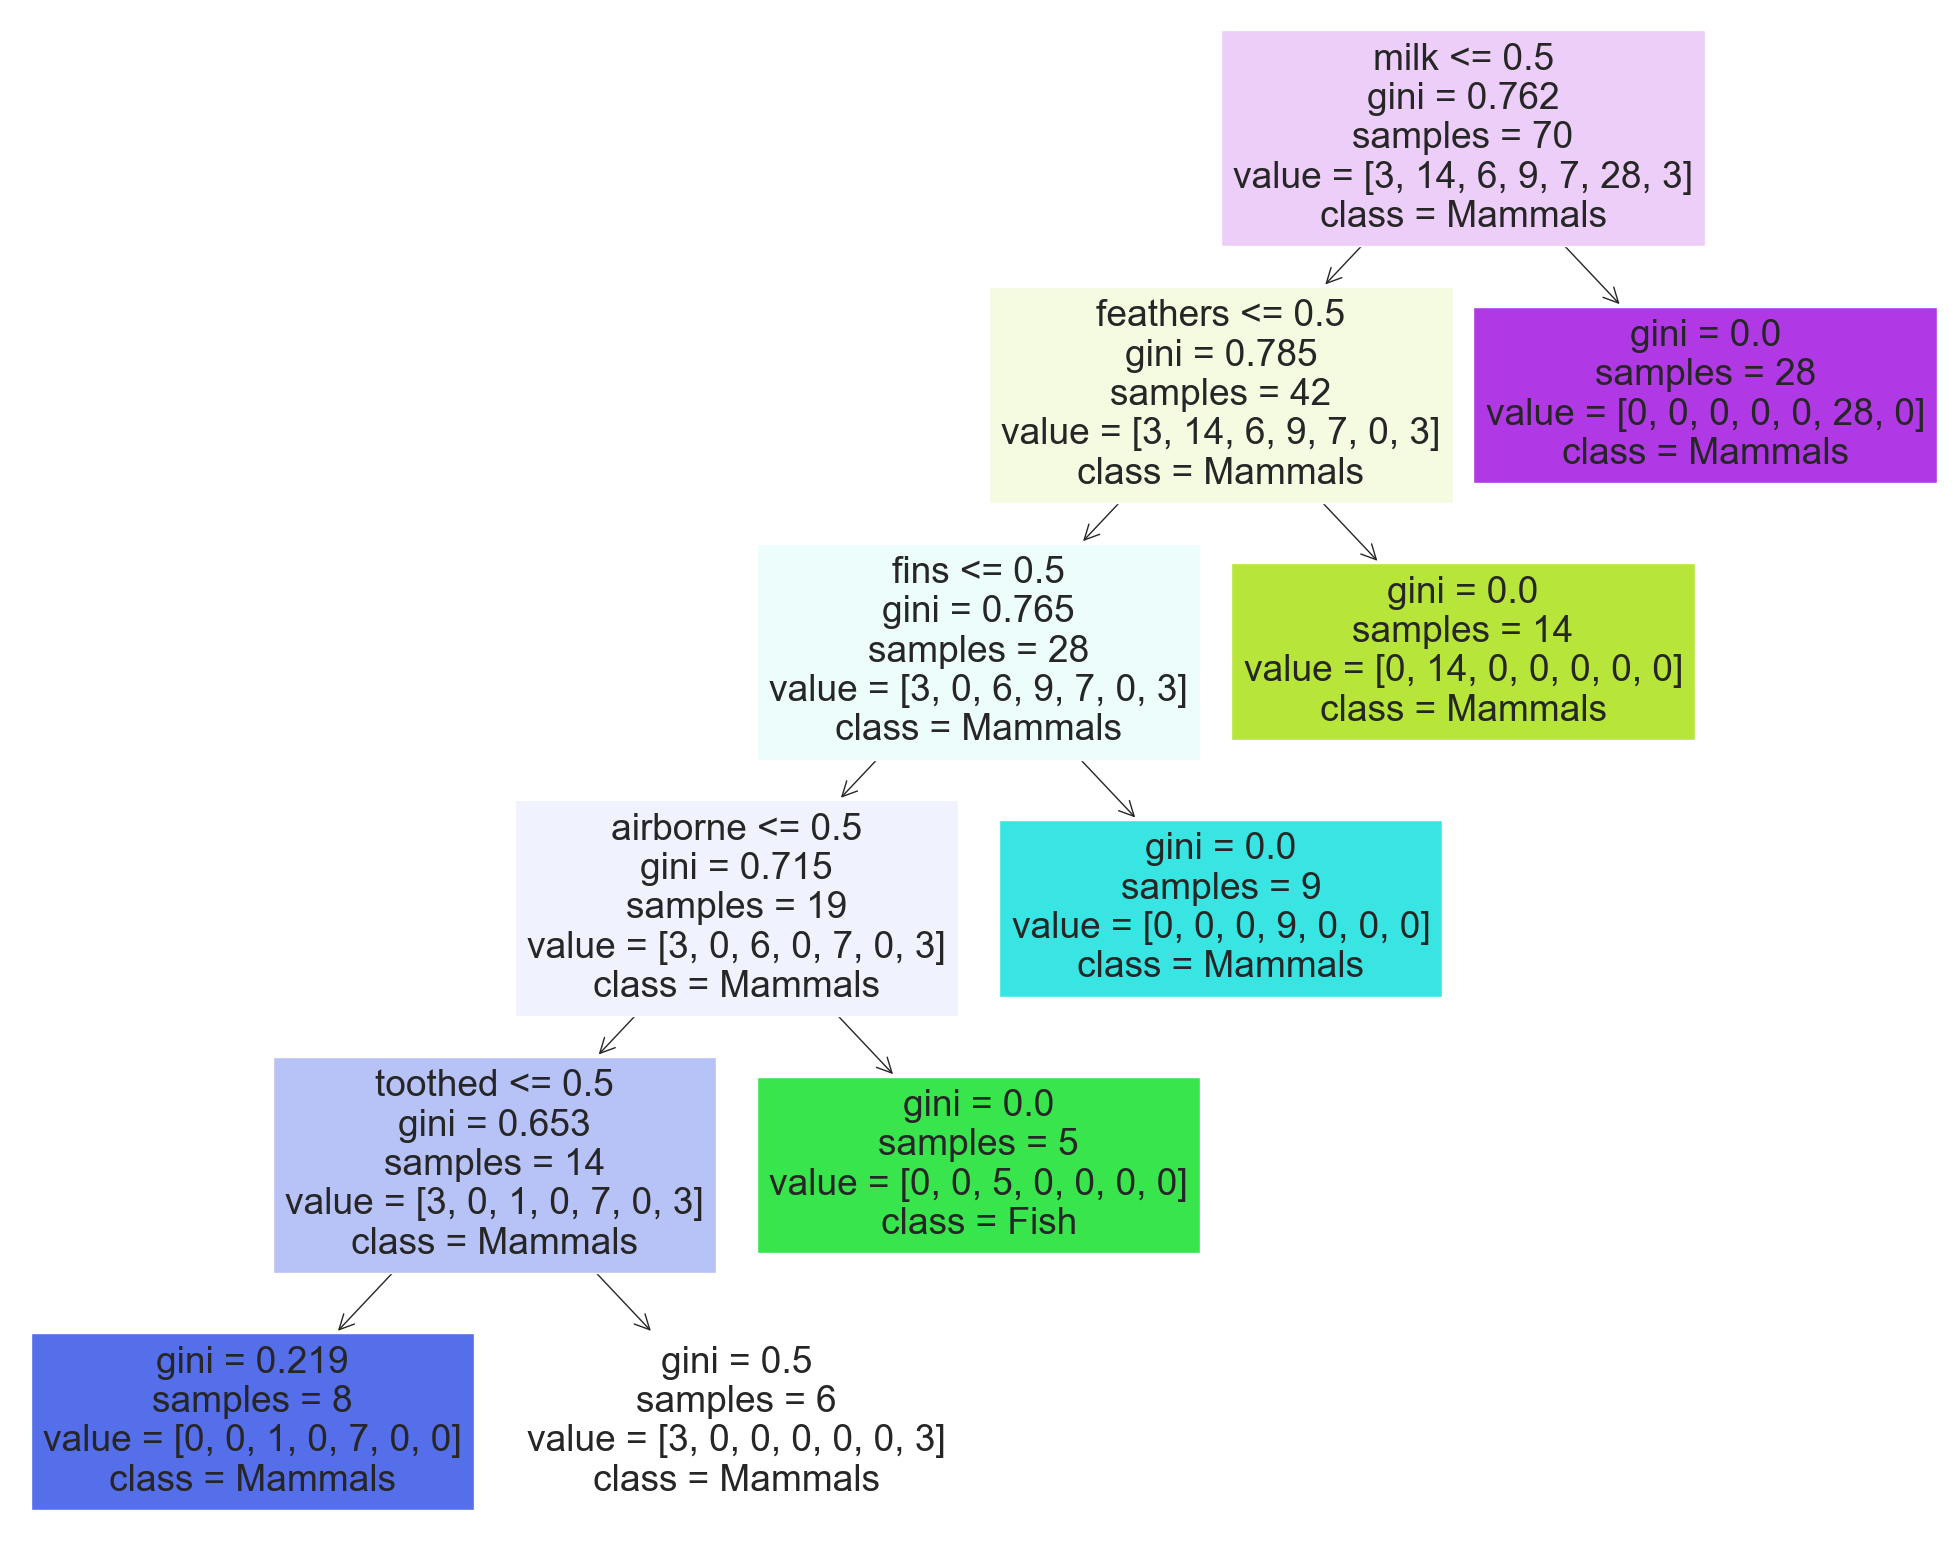

In [83]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(dt, feature_names = features, class_names = zoo["class_type_y"], filled = True, rounded = False)

plt.savefig('tree_visualization.png') 

The generated tree diagram provides a visual representation of the decision tree model for zoo animal classification.
The tree diagram illustrates the hierarchical structure of the decision tree, showing the decisions made at each node and the resulting class predictions.
From the tree diagram, we can observe that the decision tree model uses different features to classify animals into their respective classes. The tree starts with a root node and branches out based on different features such as "legs," "hair," "feathers," and so on.
This visualization helps in interpreting the model's behavior and understanding how different features contribute to the classification outcomes.

# 4:RANDOM FOREST 

In [84]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion="gini", min_samples_split=2)
model.fit(X_train, y_train)
print("training accuracy :", model.score(X_train, y_train))
print("testing accuracy :", model.score(X_test, y_test))

training accuracy : 1.0
testing accuracy : 0.9354838709677419


In [85]:
# import matplotlib.pyplot as plt
# # Creating a bar plot
# plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy])
# plt.ylim([0, 1])  # Set the y-axis limits
# plt.title('Random Forest Model Accuracy')
# plt.ylabel('Accuracy')
# # plt.show()

# 5:NAIVE BAYES 


In [102]:
from sklearn.naive_bayes import BernoulliNB

In [98]:
print ("NaiveBayes")
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Acurracy: ", clf_nb.score(X_test,y_test))
score=clf_nb.score(X_test,y_test)
scores.append(score)

NaiveBayes
Acurracy:  0.9032258064516129


In [99]:
from matplotlib.colors import ListedColormap

In [101]:
# Acc_scores = pd.Series(scores, ['Logistic Regression','KNeighborsClassifier','Decision tree', 'Random forest','naive Bayes'])

# current_palette = sns.color_palette("muted", n_colors=5)
# cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
# #colors = np.random.randint(0,5,5)

# # Make the bar Plot from f_importances 
# Acc_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)
# #plt.bar(fscores,clfs)
# plt.xlabel('', fontsize=30)
# plt.ylabel('Accuracy Score', fontsize=30)
# plt.ylim([0.75,1])
# # Show the plot
# plt.tight_layout()
# plt.show()

The Highest accuracy is obatined by Naive bayes and random forest . And lowest is Observed by decision Tree.


# THANK YOU!